In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from collections import Counter

In [23]:
df=pd.read_csv("data.csv")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [24]:
df_na = df[df.isna().any(axis=1)]
print(df_na.head())

     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom  


In [25]:
df2= df.dropna(how='all')
print(df2.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [26]:
#convert Invoice Date to date format
df2['InvoiceDate']=pd.to_datetime(df2['InvoiceDate'])
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB
None


In [27]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
df2['Month']=df2['InvoiceDate'].dt.month
df2['Year']=df2['InvoiceDate'].dt.year
df2['Sales']=df2['Quantity'] * df2['UnitPrice']
df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34


In [29]:
df2_group= df2.groupby(['Year','Month']).sum()
#df2.sort_values(by ='Sales',ascending= False, inplace=True )

print(df2_group)

            Quantity   UnitPrice    CustomerID        Sales
Year Month                                                 
2010 12       342228  260520.850  4.166977e+08   748957.020
2011 1        308966  172752.800  3.319198e+08   560000.260
     2        277989  127448.770  3.117809e+08   498062.650
     3        351872  171486.510  4.223298e+08   683267.080
     4        289098  129164.961  3.541194e+08   493207.121
     5        380391  190685.460  4.400088e+08   723333.510
     6        341623  200717.340  4.264710e+08   691123.120
     7        391116  171906.791  4.209226e+08   681300.111
     8        406199  150385.680  4.219478e+08   682680.510
     9        549817  199235.212  6.229373e+08  1019687.622
     10       570532  263434.090  7.727017e+08  1070704.670
     11       740286  327149.850  1.007384e+09  1461756.250
     12       226333  133915.660  2.702551e+08   433668.010


In [15]:
df2_year=df2[df2['Year']==2011]
#df2_year.head()
df2_year['Sales_Million']=df2_year['Sales']/1e+06
monthlysales=df2_year.groupby('Month').sum()
monthlysales=magic.reset_index()
monthlysales

<ipython-input-15-a438e457b580>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_year['Sales_Million']=df2_year['Sales']/1e+06


,Month,Quantity,UnitPrice,CustomerID,Year,Sales,Sales_Million
0,1,308966,172752.800,3.319198e+08,70680617,560000.260,0.560000
1,2,277989,127448.770,3.117809e+08,55718777,498062.650,0.498063
2,3,351872,171486.510,4.223298e+08,73900228,683267.080,0.683267
3,4,289098,129164.961,3.541194e+08,60161076,493207.121,0.493207
4,5,380391,190685.460,4.400088e+08,74467330,723333.510,0.723334
5,6,341623,200717.340,4.264710e+08,74153614,691123.120,0.691123
6,7,391116,171906.791,4.209226e+08,79470698,681300.111,0.681300
7,8,406199,150385.680,4.219478e+08,70956124,682680.510,0.682681
8,9,549817,199235.212,6.229373e+08,101004486,1019687.622,1.019688
9,10,570532,263434.090,7.727017e+08,122152162,1070704.670,1.070705


Text(0.5, 1.0, 'Sales for each month in 2011')

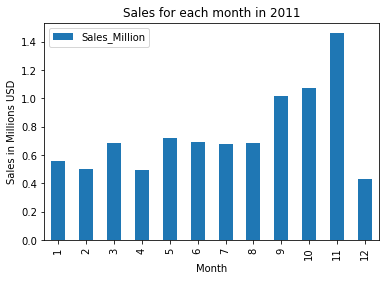

In [30]:
monthlysales.plot.bar(y='Sales_Million', x='Month')
plt.xlabel('Month')
plt.ylabel('Sales in Millions USD')
plt.title('Sales for each month in 2011')

Which top 3 countries have the highest sales in 2011?

In [31]:
df3=df2_year.groupby('Country').sum().sort_values(by='Sales',ascending=False)
df3.head(3)

,Quantity,UnitPrice,CustomerID,Month,Year,Sales,Sales_Million
Country,,,,,,,
United Kingdom,3965728,1.993793e+06,5.240239e+09,3270622,915714883,7.511064e+06,7.511064
Netherlands,193317,6.330860e+03,3.313974e+07,15117,4623289,2.758771e+05,0.275877
EIRE,137256,4.647406e+04,1.050326e+08,58131,15671723,2.542469e+05,0.254247


which times is best to show ads?

In [32]:
df2['hour']= df2['InvoiceDate'].dt.hour
df2['Year']=df2['Year'].astype(str)
df2_ads=df2.groupby(['Year','hour']).sum().sort_values(by= 'Sales', ascending=False)
#df2.head()
df2_ads

Quantity   UnitPrice    CustomerID   Month        Sales
Year hour                                                         
2011 12      775736  297514.280  1.049447e+09  538289  1278351.170
     10      641087  198697.441  5.531323e+08  321407  1245066.951
     13      633075  276191.130  9.274149e+08  475994  1092389.000
     15      552212  385508.960  6.569050e+08  519675  1066294.300
     11      595130  246614.030  7.126978e+08  364944  1063969.780
     14      542240  243152.221  7.915926e+08  430814   992998.771
     9       405281  174814.471  3.168263e+08  218982   706609.601
     16      285460  222772.760  3.572896e+08  383222   650950.350
     17      139337  116567.811  1.975851e+08  192081   407560.911
     8       155116   28943.110  1.268328e+08   61959   275697.830
     18       57011   30753.440  4.498065e+07   43130   130762.610
2010 15       57498  101538.210  4.933624e+07   73908   123163.980
     14       29309   36011.800  5.365320e+07   90336   102214.130
     13       43728   19651.590  6.934391e+07   65124    85117.370
     12       48199   16389.040  7.592252e+07   60900    84133.120
     10       43329   13994.740  3.781971e+07   40920    83989.570
     11       42542   21632.220  5.810888e+07   62220    83468.140
     16       26857   18795.860  2.843164e+07   42144    78190.470
     9        24085   14133.200  1.661476e+07   32880    60124.450
2011 19       29344   12745.920  4.889439e+07   24107    42374.940
     7        15205    1506.560  5.316111e+06    2478    30542.320
2010 17       16994   11750.630  1.386026e+07   24252    27883.200
2011 20        8074    2060.330  1.323791e+07    5926    15719.730
2010 18        3604    4233.010  3.372735e+06    9084     9811.870
     8         3047     987.220  3.254063e+06    2544     6143.030
     19        2686    1198.000  5.693860e+06    4560     3950.050
     7          156      39.750  1.465240e+05     120      467.000
     20         194     165.580  1.139450e+06     780      300.640
2011 6          -86     440.660  6.251860e+05     328     -497.350

In [33]:
df2_ads=df2_ads.reset_index().sort_values(by='Sales', ascending= False)
df2_ads

,Year,hour,Quantity,UnitPrice,CustomerID,Month,Sales
0,2011,12,775736,297514.280,1.049447e+09,538289,1278351.170
1,2011,10,641087,198697.441,5.531323e+08,321407,1245066.951
2,2011,13,633075,276191.130,9.274149e+08,475994,1092389.000
3,2011,15,552212,385508.960,6.569050e+08,519675,1066294.300
4,2011,11,595130,246614.030,7.126978e+08,364944,1063969.780
5,2011,14,542240,243152.221,7.915926e+08,430814,992998.771
6,2011,9,405281,174814.471,3.168263e+08,218982,706609.601
7,2011,16,285460,222772.760,3.572896e+08,383222,650950.350
8,2011,17,139337,116567.811,1.975851e+08,192081,407560.911
9,2011,8,155116,28943.110,1.268328e+08,61959,275697.830


In [34]:
df2_ads2011= df2_ads[df2_ads['Year']=='2011']
df2_ads2011.head()

,Year,hour,Quantity,UnitPrice,CustomerID,Month,Sales
0,2011,12,775736,297514.280,1.049447e+09,538289,1278351.170
1,2011,10,641087,198697.441,5.531323e+08,321407,1245066.951
2,2011,13,633075,276191.130,9.274149e+08,475994,1092389.000
3,2011,15,552212,385508.960,6.569050e+08,519675,1066294.300
4,2011,11,595130,246614.030,7.126978e+08,364944,1063969.780


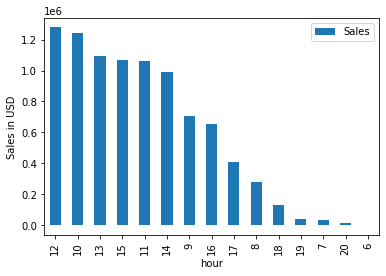

In [26]:

df2_ads2011.plot(kind='bar', x='hour', y='Sales')

plt.xlabel('hour')
plt.ylabel('Sales in USD')
plt.titles('Bar graph of Sales at Different Hours')
plt.show()



<ipython-input-35-acc1311fbde6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_ads2011['hour']= df2_ads2011['hour'].astype('int32')


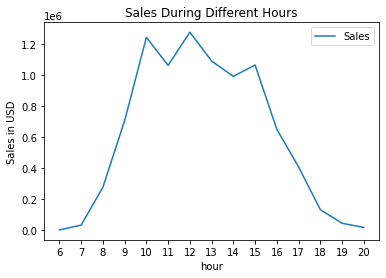

In [35]:
df2_ads2011['hour']= df2_ads2011['hour'].astype('int32')

df2_adshour =df2_ads2011.groupby('hour').sum()


df2_adshour.reset_index(inplace=True)

df2_adshour.head()

df2_adshour.plot.line(x='hour', y='Sales')
plt.xlabel('hour')
plt.ylabel('Sales in USD')
plt.xticks(df2_adshour['hour'])

plt.title('Sales During Different Hours')
plt.show()
#df2_adshour.plot.line(x='hour', y= 'Sales')


What products are most sold together?

In [38]:
df5 =df[df['InvoiceNo'].duplicated(keep=False)]
df5['bundle']=df5.groupby('InvoiceNo')['Description'].transform(lambda x:','.join(x))
df5.head()

<ipython-input-38-3b182a69004a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['bundle']=df5.groupby('InvoiceNo')['Description'].transform(lambda x:','.join(x))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,bundle
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."


In [39]:
df5=df5[['InvoiceNo','bundle']].drop_duplicates()
df5.head()        

,InvoiceNo,bundle
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
7,536366,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
9,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
21,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
26,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."


In [58]:
count=Counter()
for row in df5['bundle']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)
    
#this will help the company decide on what products to give in the buy one get one discount. 
#is there aby way to see how much sales is made from these bundles?

[(('KEY FOB ', 'KEY FOB '), 809),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 618),
 (('KEY FOB ', ' BACK DOOR '), 590),
 (('KEY FOB ', ' SHED'), 554),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 544),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  534),
 (('KEY FOB ', ' FRONT  DOOR '), 481),
 (('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 467),
 (('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE'), 461),
 (('COFFEE', 'SUGAR'), 461)]

In [ ]:
count=Counter()
for row in df5['bundle']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))
count.most_common(10)
#to see if more people buy 3 fobs or add something else

In [56]:
df2.head()
b= df2[["Quantity", "Sales"]]
b.head()

,Quantity,Sales
0,6,15.30
1,6,20.34
2,8,22.00
3,6,20.34
4,6,20.34


which product has the highest sales and which product ahs the highest quantity? is there any correlation?

In [54]:
columns_subset= df2[["Quantity", "Sales"]]

def top_data(i):
    df_product= df2.groupby[('Year','StockCode','Description').sort_values(by= i, ascending=False)] 
    df_product.head()

for j in columns_subset:
    top_data(j)

AttributeError: 'tuple' object has no attribute 'np'

In [18]:

df_product= df2.groupby(['Year', 'StockCode', 'Description']).sum('Sales').sort_values(by='Sales', ascending=False)
df_product.head()
#i dont want it to sum all of the columns just sales. I dont think the unit price should be aggreagated

Quantity  UnitPrice  \
Year StockCode Description                                               
2011 DOT       DOTCOM POSTAGE                           653  181580.87   
     22423     REGENCY CAKESTAND 3 TIER               11018   27684.57   
     47566     PARTY BUNTING                          17785    9649.97   
     85123A    WHITE HANGING HEART T-LIGHT HOLDER     31800    6411.59   
     85099B    JUMBO BAG RED RETROSPOT                45237    5014.04   

                                                   CustomerID  Month  \
Year StockCode Description                                             
2011 DOT       DOTCOM POSTAGE                        225536.0   3827   
     22423     REGENCY CAKESTAND 3 TIER            26137620.0  12558   
     47566     PARTY BUNTING                       21424509.0  10285   
     85123A    WHITE HANGING HEART T-LIGHT HOLDER  28806931.0  13069   
     85099B    JUMBO BAG RED RETROSPOT             24053040.0  13790   

                                                       Sales   hour  
Year StockCode Description                                           
2011 DOT       DOTCOM POSTAGE                      181574.29   8996  
     22423     REGENCY CAKESTAND 3 TIER            137864.83  25534  
     47566     PARTY BUNTING                        97095.24  21414  
     85123A    WHITE HANGING HEART T-LIGHT HOLDER   88637.03  26511  
     85099B    JUMBO BAG RED RETROSPOT              88383.68  25792

In [22]:
#highest quantity
df_quantity=df2.groupby(['Year','StockCode', 'Description']).sum().sort_values(by='Quantity', ascending=False)
df_quantity.head()

Quantity  UnitPrice  \
Year StockCode Description                                              
2011 84077     WORLD WAR 2 GLIDERS ASSTD DESIGNS     48652     160.58   
     85099B    JUMBO BAG RED RETROSPOT               45237    5014.04   
     22197     POPCORN HOLDER                        36334     874.50   
     84879     ASSORTED COLOUR BIRD ORNAMENT         34010    2393.28   
     21212     PACK OF 72 RETROSPOT CAKE CASES       31963     968.01   

                                                  CustomerID  Month     Sales  \
Year StockCode Description                                                      
2011 84077     WORLD WAR 2 GLIDERS ASSTD DESIGNS   6845423.0   3694  12413.80   
     85099B    JUMBO BAG RED RETROSPOT            24053040.0  13790  88383.68   
     22197     POPCORN HOLDER                     10688216.0   8239  33969.46   
     84879     ASSORTED COLOUR BIRD ORNAMENT      20150373.0   9684  54973.86   
     21212     PACK OF 72 RETROSPOT CAKE CASES    15151690.0   8209  18394.64   

                                                   hour  
Year StockCode Description                               
2011 84077     WORLD WAR 2 GLIDERS ASSTD DESIGNS   6349  
     85099B    JUMBO BAG RED RETROSPOT            25792  
     22197     POPCORN HOLDER                     11148  
     84879     ASSORTED COLOUR BIRD ORNAMENT      17721  
     21212     PACK OF 72 RETROSPOT CAKE CASES    16460

In [ ]:
are cheaper products selling more? what drives sales? how do i answer this? will sales increase next year?

In [14]:
#plot the sales of each product and the unit price on the same graph for 2011

In [ ]:
#scatter plots
corr btwn sales and unit price
and unit price and quantity
find bottom sales and top sales. if we increase the high sselling and reduce the low ones, what happens?
look at profit as a new feature
manual forecasting